In [34]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.alert import Alert
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import collections
import requests
import decimal
from IPython.display import clear_output

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from googletrans import Translator

In [37]:
# Seleniumをあらゆる環境で起動させるChromeオプション
options = Options()
options.add_argument('--disable-gpu');
options.add_argument('--disable-extensions');
options.add_argument('--proxy-server="direct://"');
options.add_argument('--proxy-bypass-list=*');
options.add_argument('--start-maximized');
# options.add_argument('--headless'); # ※ヘッドレスモードを使用する場合、コメントアウトを外す

In [38]:
DRIVER_PATH = './chromedriver'
# DRIVER_PATH = '/Users/Kenta/Desktop/Selenium/chromedriver' # ローカル
# DRIVER_PATH = '/app/.chromedriver/bin/chromedriver'        # heroku

# ブラウザの起動
driver = webdriver.Chrome(executable_path=DRIVER_PATH, options=options)

In [39]:
# Webページにアクセスする
home_url = 'https://filmarks.com/users/buddyranger'
page = 1
film_list = []
driver.get(home_url)


while requests.get( home_url + '?page=' + str(page) ).status_code != 404:
    driver.get(home_url + '?page=' + str(page))
    films_per_page = driver.find_elements_by_class_name('c-content__jacket')
    for elem in films_per_page:
        film_list.append(elem.get_attribute('href'))
    print(len(film_list))
    page += 1
    
print('finished loading film list!!!')

36
72
108
144
180
216
252
288
324
360
396
401
finished loading film list!!!


In [40]:
genre_selector = 'div.p-content-detail__genre > ul > li'
genre_list = []
for index, film in enumerate(film_list):
    clear_output()
    print('Loading... {0}%'.format('{:.3f}'.format(index / len(film_list))))
    counter = collections.Counter(genre_list)
    print(counter)
    driver.get(film)
    try:
        genres = driver.find_elements_by_css_selector(genre_selector)
        for genre in genres:
            genre_list.append(genre.text)
    except Exception:
        genre_list.append('未分類')
counter = collections.Counter(genre_list)
print(counter)

Loading... 0.998%
Counter({'アクション': 115, 'SF': 49, 'ドラマ': 48, 'ホラー': 42, 'コメディ': 36, 'スリラー': 31, 'サスペンス': 29, 'ファミリー': 26, 'アニメ': 25, 'アドベンチャー・冒険': 22, 'ファンタジー': 12, '恋愛': 12, 'ミステリー': 10, 'クライム': 10, 'パニック': 8, 'スポーツ': 3, '伝記': 3, 'バイオレンス': 3, '音楽': 2, 'ミュージカル': 2, 'ギャング・マフィア': 1, 'ドキュメンタリー': 1, '歴史': 1})
Counter({'アクション': 115, 'SF': 49, 'ドラマ': 48, 'ホラー': 42, 'コメディ': 36, 'スリラー': 31, 'サスペンス': 29, 'ファミリー': 26, 'アニメ': 25, 'アドベンチャー・冒険': 22, 'ファンタジー': 12, '恋愛': 12, 'ミステリー': 10, 'クライム': 10, 'パニック': 8, 'スポーツ': 3, '伝記': 3, 'バイオレンス': 3, '音楽': 2, 'ミュージカル': 2, 'ギャング・マフィア': 1, 'ドキュメンタリー': 1, '歴史': 1})


In [42]:
translator = Translator()
values_en = []
for value in counter.keys():
    values_en.append(translator.translate(value).text)
print(values_en)

['action', 'Suspense', 'Horror', 'Adventure / Adventure', 'SF', 'Mystery', 'comedy', 'panic', 'Drama', 'Fantasy', 'Thriller', 'Sports', 'biography', 'family', 'Anime', 'love', 'musics', 'Gang Mafia', 'musical', 'documentary', 'Crime', 'Violence', 'history']


([<matplotlib.patches.Wedge at 0x11a5b8f10>,
 [Text(0.8154153998434445, 0.7383073382394053, 'action'),
  Text(-0.09489746916832137, 1.095898932541431, 'Suspense'),
  Text(-0.5661731548615132, 0.9431054865253203, 'Horror'),
  Text(-0.89485674142851, 0.6397119760641885, 'Adventure / Adventure'),
  Text(-1.0848139646420365, 0.18215010874997178, 'SF'),
  Text(-1.0755705805686582, -0.23053834001137363, 'Mystery'),
  Text(-0.9624416464628675, -0.5326406641947694, 'comedy'),
  Text(-0.7765722941495201, -0.7790606343278753, 'panic'),
  Text(-0.4540445396667503, -1.0019199349243477, 'Drama'),
  Text(-0.04573509868430378, -1.0990488163627388, 'Fantasy'),
  Text(0.25456509966089186, -1.070138593844106, 'Thriller'),
  Text(0.4795355489033567, -0.9899725538306386, 'Sports'),
  Text(0.5171780655655731, -0.9708382195288008, 'biography'),
  Text(0.6874098064025517, -0.8587594296784209, 'family'),
  Text(0.9264152254201887, -0.5930892260947429, 'Anime'),
  Text(1.0396751597861336, -0.35927087569642724,

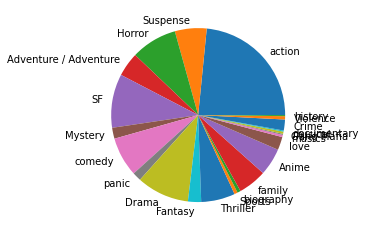

In [43]:
# 円グラフを描画
x = np.array(list(counter.values()))
label = list(counter.keys())
plt.pie(x, labels=values_en)

In [ ]:
# # Googleにアクセスする
# url = 'https://google.com/'
# driver.get(url)

# # 検索窓にSeleniumと入力する
# selector = '#tsf > div:nth-child(2) > div.A8SBwf > div.RNNXgb > div > div.a4bIc > input'
# element = driver.find_element_by_css_selector(selector)
# element.send_keys('Selenium')

# # enterキーを押す
# element.send_keys(Keys.ENTER)

# # 1位の記事のタイトルを取得する
# selector = '#rso > div:nth-child(1) > div > div.yuRUbf > a > h3 > span'
# element = driver.find_element_by_css_selector(selector)
# page_title = element.text

# # 1位の記事のURLを取得する
# selector = '#rso > div:nth-child(1) > div > div.yuRUbf > a'
# element = driver.find_element_by_css_selector(selector)
# page_url = element.get_attribute('href')

# # ブラウザを終了する(全てのウィンドウを閉じる）
# # Chromeのショートカットキー(Command+Q)と同じ動作
# driver.quit()

# print(page_title, page_url)
# # 10分で理解する Selenium - Qiita https://qiita.com/Chanmoro/items/9a3c86bb465c1cce738a

In [ ]:
print(list(counter.keys()))
print(list(counter.values()))

In [ ]:
import sys
print(sys.path)

In [ ]:
for count in counter:
    print(counter)